### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, espec
ially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#missings
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [8]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,left
0,11428
1,3571


### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [9]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [11]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [12]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [13]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns1 = feature_columns[1:5]

In [19]:
feature_columns1

Index(['average_montly_hours', 'department_RandD', 'department_accounting',
       'department_hr'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [21]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622659264606),
 ('average_montly_hours', 0.004975630648702964),
 ('department_RandD', -0.5707636257250402),
 ('department_accounting', 0.09300301033506674),
 ('department_hr', 0.35887704320325536),
 ('department_management', -0.36238814510653666),
 ('department_marketing', 0.1304743042974414),
 ('department_product_mng', 0.023809160127111092),
 ('department_sales', 0.07584180052384325),
 ('department_support', 0.13493942577306295),
 ('department_technical', 0.19545537758819428),
 ('last_evaluation', 0.5925857374606656),
 ('number_project', -0.30373340935550674),
 ('promotion_last_5years_1', -1.2172793589365365),
 ('salary_low', 1.8131725510337624),
 ('salary_medium', 1.3088618866113126),
 ('satisfaction_level', -4.108267541873691),
 ('time_spend_company', 0.265298528613896)]

In [23]:
logreg.intercept_

array([-1.53003327])

In [24]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [25]:

hr_test_pred = hr_test_pred.reset_index()

In [26]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
916,12628,1,0
881,10442,0,0
1522,10747,0,0
1111,6532,0,0
415,9628,0,0
2038,9983,0,0
1035,5763,0,0
2593,9416,0,1
168,5775,0,0
1308,5597,0,0


In [27]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

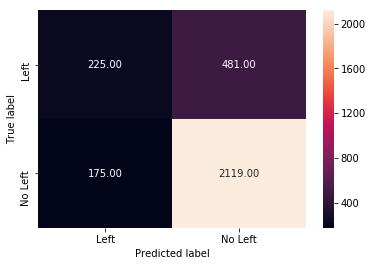

In [29]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [30]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [31]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97203474 0.02796526]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [32]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [33]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [34]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [35]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

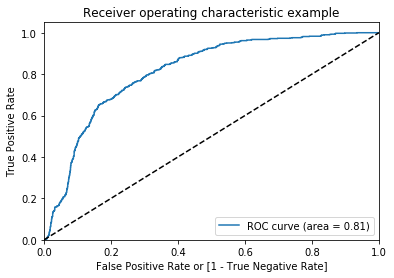

In [36]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.91905401 0.91905401 0.90057484 0.88605895 0.88001362 0.87933851
 0.872333   0.86974563 0.86193267 0.85880292]
[0.         0.00087184 0.00130776 0.00174368 0.0021796  0.00261552
 0.00305144 0.00348736 0.00392328 0.0043592 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [39]:
round( float( cutoff_prob ), 2 )

0.28

In [40]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [41]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972035,0.027965,0
1,6473,0,0,0.917792,0.082208,0
2,4679,0,0,0.770442,0.229558,0
3,862,1,0,0.523038,0.476962,1
4,7286,0,0,0.975843,0.024157,0
5,8127,0,0,0.722851,0.277149,0
6,3017,0,0,0.985596,0.014404,0
7,3087,0,1,0.130254,0.869746,1
8,6425,0,0,0.769714,0.230286,0
9,2250,0,1,0.398617,0.601383,1


Text(0.5,15,'Predicted label')

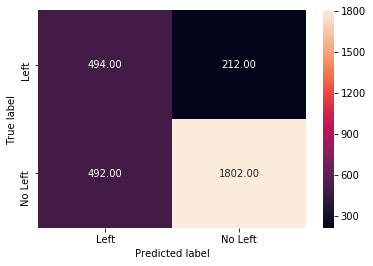

In [42]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [48]:
KNeighborsClassifier?

In [46]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(train_X, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

             precision    recall  f1-score   support

          0       0.97      0.94      0.96      2294
          1       0.83      0.91      0.87       706

avg / total       0.94      0.94      0.94      3000



In [ ]:
#with one tuning parameter

In [66]:
tuned_parameters = [{'n_neighbors': [5,7,9,11,13,15,17]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')

In [63]:
knn_clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [6, 8, 10, 11, 12, 13, 14, 15, 17]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [64]:
knn_clf.best_score_

0.9715321887402473

In [65]:
knn_clf.best_params_

{'n_neighbors': 10}

In [ ]:
#with multiple tuning parameter

In [77]:
tuned_parameters = [{'n_neighbors': [9,11,13,15,17,19,21], 'weights': ['distance', 'uniform']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=10,
                   scoring='roc_auc')

In [79]:
knn_clf.fit(train_X, train_y )

knn_clf.best_score_

0.9854409243086568

In [80]:
knn_clf.best_params_

{'n_neighbors': 21, 'weights': 'distance'}

In [ ]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

In [113]:
#Prediction

In [70]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97      2294
          1       0.85      0.97      0.91       706

avg / total       0.96      0.95      0.95      3000



In [74]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )


Text(0.5,15,'Predicted label')

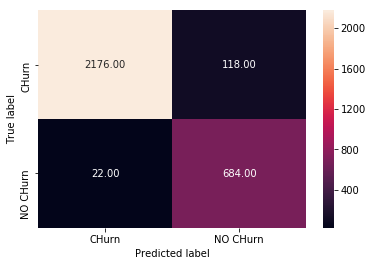

In [75]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["CHurn", "NO CHurn"] , yticklabels = ["CHurn", "NO CHurn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [76]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.9533333333333334

### Naive Bayes

In [90]:
import sklearn.naive_bayes as nb

In [92]:
nb.BernoulliNB?

In [91]:
nb.MultinomialNB?

In [ ]:
nb.GaussianNB?

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

/Users/sb/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sb/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [93]:
nb_clf = GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None)

Text(0.5,15,'Predicted label')

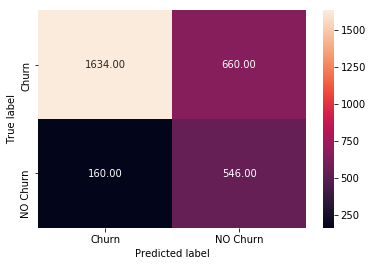

In [94]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X ) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "NO Churn"] , yticklabels = ["Churn", "NO Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [95]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.7266666666666667

In [96]:
metrics.roc_auc_score( test_y, nb_clf.predict( test_X ) )

0.7428320214576268